## importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

## importing the data set and converting it to a dataframe

In [2]:
df = pd.read_csv("housePrice.csv")
df.columns = map(str.lower, df.columns)

# preprocessing


#### 1.converting "area" column values to integers

In [3]:
df['area'] = [''.join(x.split(',')) for x in df['area']]
df['area'] = pd.to_numeric(df['area'])

In [4]:
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        3479 non-null   int64  
 1   room        3479 non-null   int64  
 2   parking     3479 non-null   bool   
 3   warehouse   3479 non-null   bool   
 4   elevator    3479 non-null   bool   
 5   address     3456 non-null   object 
 6   price       3479 non-null   float64
 7   price(usd)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 146.2+ KB
None
               area         room         price    price(usd)
count  3.479000e+03  3479.000000  3.479000e+03  3.479000e+03
mean   8.744000e+06     2.079908  5.359023e+09  1.786341e+05
std    3.167266e+08     0.758275  8.099935e+09  2.699978e+05
min    3.000000e+01     0.000000  3.600000e+06  1.200000e+02
25%    6.900000e+01     2.000000  1.418250e+09  4.727500e+04
50%    9.000000e+01     2.000000  2.9000

,area,room,parking,warehouse,elevator,address,price,price(usd)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


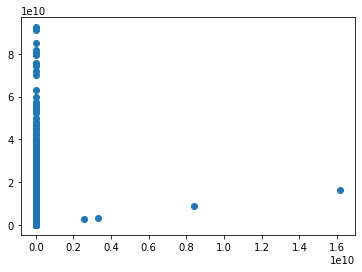

In [5]:
plt.scatter(df['area'], df['price'])
plt.show()

2. #### omitting df rows that contain obviouse outliers in the 'area' column

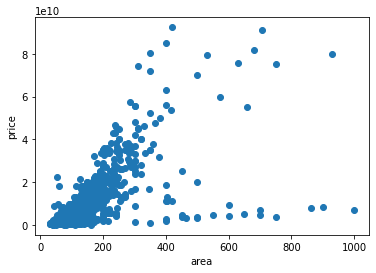

In [6]:
df['area'] = df['area'].where(df['area']<1500, np.nan)
df = df.dropna(subset=['area'])
plt.scatter(df['area'], df['price'])
plt.xlabel('area')
plt.ylabel('price')
plt.show()

#### 3.omitting df rows that does not contain any address

In [7]:
from sklearn.preprocessing import LabelEncoder
df = df.dropna(subset=['address'])
le = LabelEncoder()
le.fit(df['address'])
df['address_number'] = le.transform(df['address'])

#### 4. plotting different features vs. price

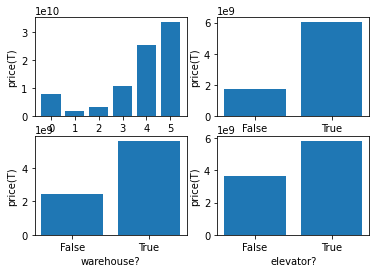

In [8]:
room_price_mean = df.groupby('room').price.mean()
plt.subplot(221)
plt.bar([str(x) for x in list(room_price_mean.index)], room_price_mean.values)
plt.xlabel('number of rooms')
plt.ylabel('price(T)')
plt.subplot(222)
parking_price_mean = df.groupby('parking').price.mean()
plt.bar(parking_price_mean.index.astype(str), parking_price_mean.values)
plt.xlabel('parking?')
plt.ylabel('price(T)')
plt.subplot(223)
warehouse_price_mean = df.groupby('warehouse').price.mean()
plt.bar(warehouse_price_mean.index.astype(str), warehouse_price_mean.values)
plt.xlabel('warehouse?')
plt.ylabel('price(T)')
plt.subplot(224)
elevator_price_mean = df.groupby('elevator').price.mean()
plt.bar(elevator_price_mean.index.astype(str), elevator_price_mean.values)
plt.xlabel('elevator?')
plt.ylabel('price(T)')
plt.show()

#### 5. replaceing True/False with 1/0 in different columns

In [9]:
df['parking'].replace({True: 1, False: 0}, inplace=True)
df['warehouse'].replace({True: 1, False: 0}, inplace=True)
df['elevator'].replace({True: 1, False: 0}, inplace=True)

#### 6. defining a newdata frame for further processes

In [10]:
cdf = df[['area', 'room', 'parking', 'warehouse', 'elevator', 'address_number', 'price(usd)']]

#### 7. masking and creating training and test data

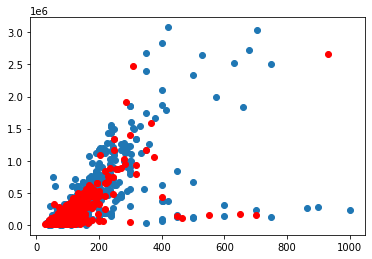

In [11]:
msk = np.random.rand( len(cdf) ) < 0.8

train_set = cdf[msk]
test_set = cdf[~msk]

plt.scatter(train_set['area'], train_set['price(usd)'])
plt.scatter(test_set['area'], test_set['price(usd)'], color='red')
plt.show()

#### 8. machine learning processing using second degree polynomial

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train_x = np.asanyarray(train_set[['area', 'room', 'parking', 'warehouse', 'elevator', 'address_number']])
train_y = np.asanyarray(train_set[['price(usd)']])
test_x = np.asanyarray(test_set[['area', 'room', 'parking', 'warehouse', 'elevator', 'address_number']])
test_y = np.asanyarray(test_set[['price(usd)']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.fit_transform(test_x)

regr = LinearRegression()
regr.fit(train_x_poly, train_y)

from sklearn.metrics import r2_score
eval_y = regr.predict(test_x_poly)
R2 = r2_score(test_y, eval_y)
print('R2 is: ', R2)


R2 is:  0.7037983972624771
